In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import sys
#sys.path.append("/ahg/regevdata/projects/Cell2CellCommunication/code/MIMOSCA")
import perturbseq as perturb

%matplotlib inline
import matplotlib.pyplot as plt


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=200, color_map='viridis')
sc.logging.print_versions()
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
cairo               1.20.1
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask  

In [2]:
import scanpy as sc
import decoupler as dc

# Only needed for visualization:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
FIGS="/Users/ursuo/Documents/research/baf/data/2022-03-27/Figures/"
#combo data
COMBO_DATA="/Users/ursuo/Documents/research/baf/data/2022-03-27/combo2"
pref=COMBO_DATA+'/Baf.combo'

In [5]:
adata=sc.read(pref+'.guide_qc.filtered.h5ad')
adata

Only considering the two last: ['.filtered', '.h5ad'].
Only considering the two last: ['.filtered', '.h5ad'].


AnnData object with n_obs × n_vars = 6891 × 20018
    obs: 'n_genes', 'batch', 'SMARCE1_1', 'DPF2_4', 'BCL7C_2', 'ARID2_1', 'NTC7_IG1144056', 'PHF10_1', 'SMARCA2_4', 'BCL7B_1', 'SMARCB1_5', 'ARID1B_4', 'NTC6_IG1216445', 'NTC1_IG345439', 'PBRM1_3', 'GLTSCR1_1', 'BCL7A_3', 'GLTSCR1L_3', 'SMARCC1_7', 'ARID1A_3', 'SMARCC2_3', 'SMARCA4_4', 'SS18_2', 'SMARCD2_3', 'BRD7_2', 'SMARCD1_4', 'SS18L_1', 'BRD9_2', 'SMARCB1', 'BRD7', 'PBRM1', 'BCL7A', 'PHF10', 'ARID1A', 'SS18', 'cell', 'BCL7C', 'BCL7B', 'SMARCC1', 'GLTSCR1', 'SMARCC2', 'control', 'DPF2', 'SMARCE1', 'SMARCA4', 'BRD9', 'GLTSCR1L', 'SS18L', 'ARID2', 'SMARCD2', 'SMARCD1', 'SMARCA2', 'ARID1B', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '0', '1', '2', 'leiden', 'cell_state'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 's

In [28]:
set(adata.obs['gene'])

{'ARID1A',
 'ARID1A,ARID1B',
 'ARID1A,ARID1B,ARID2',
 'ARID1A,ARID1B,BRD9',
 'ARID1A,ARID1B,DPF2',
 'ARID1A,ARID1B,SMARCB1',
 'ARID1A,ARID1B,SMARCE1',
 'ARID1A,ARID2',
 'ARID1A,BRD9',
 'ARID1A,DPF2',
 'ARID1A,SMARCB1',
 'ARID1B',
 'ARID1B,ARID2',
 'ARID1B,ARID2,BRD9',
 'ARID1B,ARID2,SMARCB1',
 'ARID1B,BRD9',
 'ARID1B,DPF2',
 'ARID1B,GLTSCR1',
 'ARID1B,SMARCB1',
 'ARID1B,SMARCE1',
 'ARID1B,SS18',
 'ARID1B,control',
 'ARID2',
 'ARID2,BRD9',
 'ARID2,PBRM1',
 'ARID2,SMARCB1',
 'ARID2,SMARCE1',
 'BCL7A',
 'BCL7B',
 'BCL7C',
 'BRD7',
 'BRD7,PBRM1',
 'BRD9',
 'BRD9,GLTSCR1',
 'BRD9,GLTSCR1,GLTSCR1L',
 'BRD9,GLTSCR1L',
 'DPF2',
 'DPF2,PHF10',
 'GLTSCR1',
 'GLTSCR1,GLTSCR1L',
 'GLTSCR1L',
 'PBRM1',
 'PHF10',
 'SMARCA2',
 'SMARCA2,SMARCA4',
 'SMARCA4',
 'SMARCB1',
 'SMARCC1',
 'SMARCC1,SMARCC2',
 'SMARCC2',
 'SMARCD1',
 'SMARCD1,SMARCD2',
 'SMARCD2',
 'SMARCE1',
 'SS18',
 'SS18,SS18L',
 'SS18L',
 'control',
 'unassigned'}

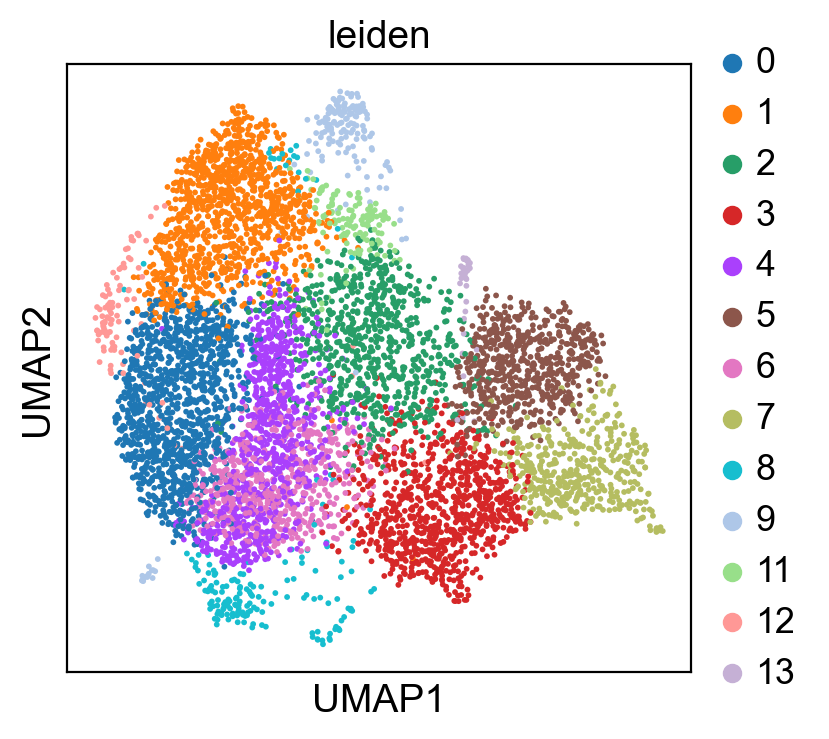

In [7]:
sc.pl.umap(adata, color='leiden')

In [8]:
net = dc.get_dorothea(organism='human', levels=['A','B','C'])
net

source confidence  target    weight
0       ETS1          A   IL12B  1.000000
1       RELA          A     IL6  1.000000
2       MITF          A  BCL2A1 -1.000000
3       E2F1          A  TRERF1  1.000000
4       MITF          A    BCL2  1.000000
...      ...        ...     ...       ...
32272  IKZF1          C   PTK2B  0.333333
32273  IKZF1          C   PRKCB  0.333333
32274  IKZF1          C   PREX1  0.333333
32275   IRF4          C  SLAMF7  0.333333
32276  ZNF83          C  ZNF331  0.333333

[32277 rows x 4 columns]

In [9]:
keep=['JUND','FOSL2','NFE2','RUNX2',
     'CTCF','SNAI2',
      'BATF','CEBPA','ETV4','ATF4','GATA1',  
     ]

tftf=net.loc[net['target'].isin(keep),:]
tftf.sort_values(by='target')

source confidence target    weight
5458      MYC          A   ATF4  1.000000
21600    ETS1          C   ATF4  0.333333
17103    USF2          C   ATF4  0.333333
12388     VDR          B   ATF4  0.500000
24974   NFKB1          C   BATF  0.333333
16335   RUNX3          C   BATF  0.333333
3811    HNF4A          A  CEBPA  1.000000
5784     USF1          A  CEBPA  1.000000
3837      MYC          A  CEBPA -1.000000
3841      MYB          A  CEBPA  1.000000
4053    FOXA1          A  CEBPA  1.000000
1031      YY1          A   CTCF  1.000000
5697    NFKB1          A   CTCF -1.000000
7854    HNF4A          B   ETV4  0.500000
9742     MITF          B   ETV4  0.500000
26454    CUX1          C   ETV4  0.333333
2511     ETS1          A   ETV4  1.000000
1297     E2F1          A   ETV4  1.000000
22618   FOSL2          C   ETV4  0.333333
10963    EGR1          B   ETV4  0.500000
30639   GATA3          C   ETV4  0.333333
11707  PRDM14          B  FOSL2  0.500000
27301     MYC          C  FOSL2  0.333333
23943   CEBPA          C  FOSL2  0.333333
5471     FLI1          A  GATA1  1.000000
2345    GATA2          A  GATA1  1.000000
2146     SPI1          A  GATA1  1.000000
4925    CEBPE          A  GATA1 -1.000000
21023    ESR2          C   JUND  0.333333
10269    E2F1          B   JUND  0.500000
30013   HIF1A          C   JUND  0.333333
22016    EGR1          C   JUND  0.333333
21307    ESR1          C   JUND  0.333333
2138    GATA1          A   NFE2  1.000000
22639    FOSB          C  RUNX2  0.333333
1193    TRPS1          A  RUNX2 -1.000000
4128      FOS          A  RUNX2  1.000000
14125   RUNX1          B  RUNX2  0.500000
3397      JUN          A  RUNX2  1.000000
2344     ESR1          A  RUNX2  1.000000
30953    JUND          C  RUNX2  0.333333
29733   GATA3          C  SNAI2  0.333333
569      MITF          A  SNAI2  1.000000
4121     LEF1          A  SNAI2  1.000000
1179   TCF7L2          A  SNAI2  1.000000
4436       AR          A  SNAI2  1.000000
5916     TCF7          A  SNAI2  1.000000

In [10]:
dc.run_mlm(mat=adata, net=net, source='source', target='target', weight='weight', verbose=True)


435 features of mat are empty in 6888 samples, they will be ignored.


  0%|          | 0/1 [00:00<?, ?it/s]

Running mlm on mat with 6891 samples and 19583 targets for 286 sources.


100%|██████████| 1/1 [00:07<00:00,  7.93s/it]


In [11]:
adata.obsm['mlm_estimate']

AHR        AR     ARID2    ARID3A      ARNT  \
GCTTTCGGTCTTGAAC-1-1 -0.174575  3.453634  0.352971 -1.625733  1.227254   
TGAGTCAAGCCTCATA-1-0 -1.130532  3.191654  1.053661 -1.731595  1.696689   
TTCGATTCAGAACCGA-1-2 -0.810090  2.590570  0.120092 -1.915994  0.780315   
ACTGATGTCCACAGCG-1-0  0.412143  3.158382  2.485485 -1.608721  0.763121   
ATCGTAGTCATGAGGG-1-2 -0.731699  2.651211  0.533085 -2.269106  1.188452   
...                        ...       ...       ...       ...       ...   
GGAAGTGAGAATACAC-1-1 -0.798534  2.380918  0.269568 -1.916846  2.303560   
ATACTTCGTACGAGTG-1-2 -0.207670  2.620877  1.283122 -0.869998  1.347105   
GTGCACGTCTCCCAAC-1-0 -1.284800  2.965741  0.740420 -1.941316  2.090499   
AGACCATGTTATCTGG-1-0  0.268822  3.650318  1.701458 -2.502458  1.319280   
CACATGACAACTGTGT-1-1  0.153162  3.369066  1.559660 -1.332868  0.884287   

                         ARNTL     ASCL1      ATF1      ATF2      ATF3  ...  \
GCTTTCGGTCTTGAAC-1-1 -1.749750  0.000427  0.578185  2.430164 -1.144738  ...   
TGAGTCAAGCCTCATA-1-0 -1.404330 -0.693388  1.595189  2.084299 -0.563222  ...   
TTCGATTCAGAACCGA-1-2 -1.752656 -0.002425 -0.251728  1.813452 -1.212581  ...   
ACTGATGTCCACAGCG-1-0 -1.131784 -0.297886  1.449482  2.243552  0.052411  ...   
ATCGTAGTCATGAGGG-1-2 -1.651243 -0.093520  1.618752  2.371297 -1.058968  ...   
...                        ...       ...       ...       ...       ...  ...   
GGAAGTGAGAATACAC-1-1 -1.208674  0.057230  0.206994  2.340261 -1.186647  ...   
ATACTTCGTACGAGTG-1-2 -2.228063  0.046917 -0.405275  3.087024 -1.671475  ...   
GTGCACGTCTCCCAAC-1-0 -2.072418 -0.595703  0.396281  1.763596 -0.387886  ...   
AGACCATGTTATCTGG-1-0 -1.703805 -0.038863  0.596543  3.033990 -1.212045  ...   
CACATGACAACTGTGT-1-1 -1.445246 -0.198426  0.271159  2.045399 -1.706326  ...   

                        ZNF217     ZNF24    ZNF263    ZNF274    ZNF384  \
GCTTTCGGTCTTGAAC-1-1  0.337756 -0.811699 -2.424457 -1.066119  0.907516   
TGAGTCAAGCCTCATA-1-0  0.564168 -0.339742 -2.047416 -0.207934  1.060332   
TTCGATTCAGAACCGA-1-2  0.614248  0.262073 -1.851807 -0.890474  0.886755   
ACTGATGTCCACAGCG-1-0  0.530173 -0.685468 -2.108853  0.063669  1.644926   
ATCGTAGTCATGAGGG-1-2  0.538672 -0.581847 -1.323730  0.367999  1.295145   
...                        ...       ...       ...       ...       ...   
GGAAGTGAGAATACAC-1-1 -0.126204  0.588295 -1.147788  0.310870  1.306045   
ATACTTCGTACGAGTG-1-2  0.135223 -0.680214 -0.444048  0.308614  1.088884   
GTGCACGTCTCCCAAC-1-0 -0.235464 -0.425600 -2.569616 -0.174396  0.754790   
AGACCATGTTATCTGG-1-0  0.215009 -0.407738 -2.211080 -0.420716  0.488116   
CACATGACAACTGTGT-1-1  0.322529 -0.371923 -2.244794 -0.289074  1.328155   

                        ZNF584    ZNF592    ZNF639    ZNF644    ZNF740  
GCTTTCGGTCTTGAAC-1-1  0.903521 -0.405815  3.046210 -0.114133  1.682506  
TGAGTCAAGCCTCATA-1-0  0.798531  0.303889  4.599247  0.815727  2.149835  
TTCGATTCAGAACCGA-1-2  0.308325  0.096598  2.686048 -0.057727  1.856827  
ACTGATGTCCACAGCG-1-0 -0.323891 -0.569434  4.045905 -0.825748  1.379385  
ATCGTAGTCATGAGGG-1-2  0.028171  0.038258  2.377147 -0.585042  1.831929  
...                        ...       ...       ...       ...       ...  
GGAAGTGAGAATACAC-1-1 -1.170760  0.288726  1.942260  0.030978 -0.370749  
ATACTTCGTACGAGTG-1-2 -0.782128 -0.687408  1.243865 -0.308029  0.781044  
GTGCACGTCTCCCAAC-1-0  1.225550  0.482616  2.061767  0.100161  1.411142  
AGACCATGTTATCTGG-1-0 -0.362642  0.079993  3.351990 -1.351078  1.110252  
CACATGACAACTGTGT-1-1  0.919128 -0.159192  4.383491 -0.293328  1.033506  

[6891 rows x 286 columns]

In [12]:
adata.obsm['dorothea_mlm_estimate'] = adata.obsm['mlm_estimate'].copy()
adata.obsm['dorothea_mlm_pvals'] = adata.obsm['mlm_pvals'].copy()
adata

AnnData object with n_obs × n_vars = 6891 × 20018
    obs: 'n_genes', 'batch', 'SMARCE1_1', 'DPF2_4', 'BCL7C_2', 'ARID2_1', 'NTC7_IG1144056', 'PHF10_1', 'SMARCA2_4', 'BCL7B_1', 'SMARCB1_5', 'ARID1B_4', 'NTC6_IG1216445', 'NTC1_IG345439', 'PBRM1_3', 'GLTSCR1_1', 'BCL7A_3', 'GLTSCR1L_3', 'SMARCC1_7', 'ARID1A_3', 'SMARCC2_3', 'SMARCA4_4', 'SS18_2', 'SMARCD2_3', 'BRD7_2', 'SMARCD1_4', 'SS18L_1', 'BRD9_2', 'SMARCB1', 'BRD7', 'PBRM1', 'BCL7A', 'PHF10', 'ARID1A', 'SS18', 'cell', 'BCL7C', 'BCL7B', 'SMARCC1', 'GLTSCR1', 'SMARCC2', 'control', 'DPF2', 'SMARCE1', 'SMARCA4', 'BRD9', 'GLTSCR1L', 'SS18L', 'ARID2', 'SMARCD2', 'SMARCD1', 'SMARCA2', 'ARID1B', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '0', '1', '2', 'leiden', 'cell_state'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 's

In [13]:
acts = dc.get_acts(adata, obsm_key='mlm_estimate')
acts

AnnData object with n_obs × n_vars = 6891 × 286
    obs: 'n_genes', 'batch', 'SMARCE1_1', 'DPF2_4', 'BCL7C_2', 'ARID2_1', 'NTC7_IG1144056', 'PHF10_1', 'SMARCA2_4', 'BCL7B_1', 'SMARCB1_5', 'ARID1B_4', 'NTC6_IG1216445', 'NTC1_IG345439', 'PBRM1_3', 'GLTSCR1_1', 'BCL7A_3', 'GLTSCR1L_3', 'SMARCC1_7', 'ARID1A_3', 'SMARCC2_3', 'SMARCA4_4', 'SS18_2', 'SMARCD2_3', 'BRD7_2', 'SMARCD1_4', 'SS18L_1', 'BRD9_2', 'SMARCB1', 'BRD7', 'PBRM1', 'BCL7A', 'PHF10', 'ARID1A', 'SS18', 'cell', 'BCL7C', 'BCL7B', 'SMARCC1', 'GLTSCR1', 'SMARCC2', 'control', 'DPF2', 'SMARCE1', 'SMARCA4', 'BRD9', 'GLTSCR1L', 'SS18L', 'ARID2', 'SMARCD2', 'SMARCD1', 'SMARCA2', 'ARID1B', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '0', '1', '2', 'leiden', 'cell_state'
    uns: 'cell_state_colors', 'guide2gene', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'mlm_estimate', 'mlm_pvals', 'dorothea_mlm_e

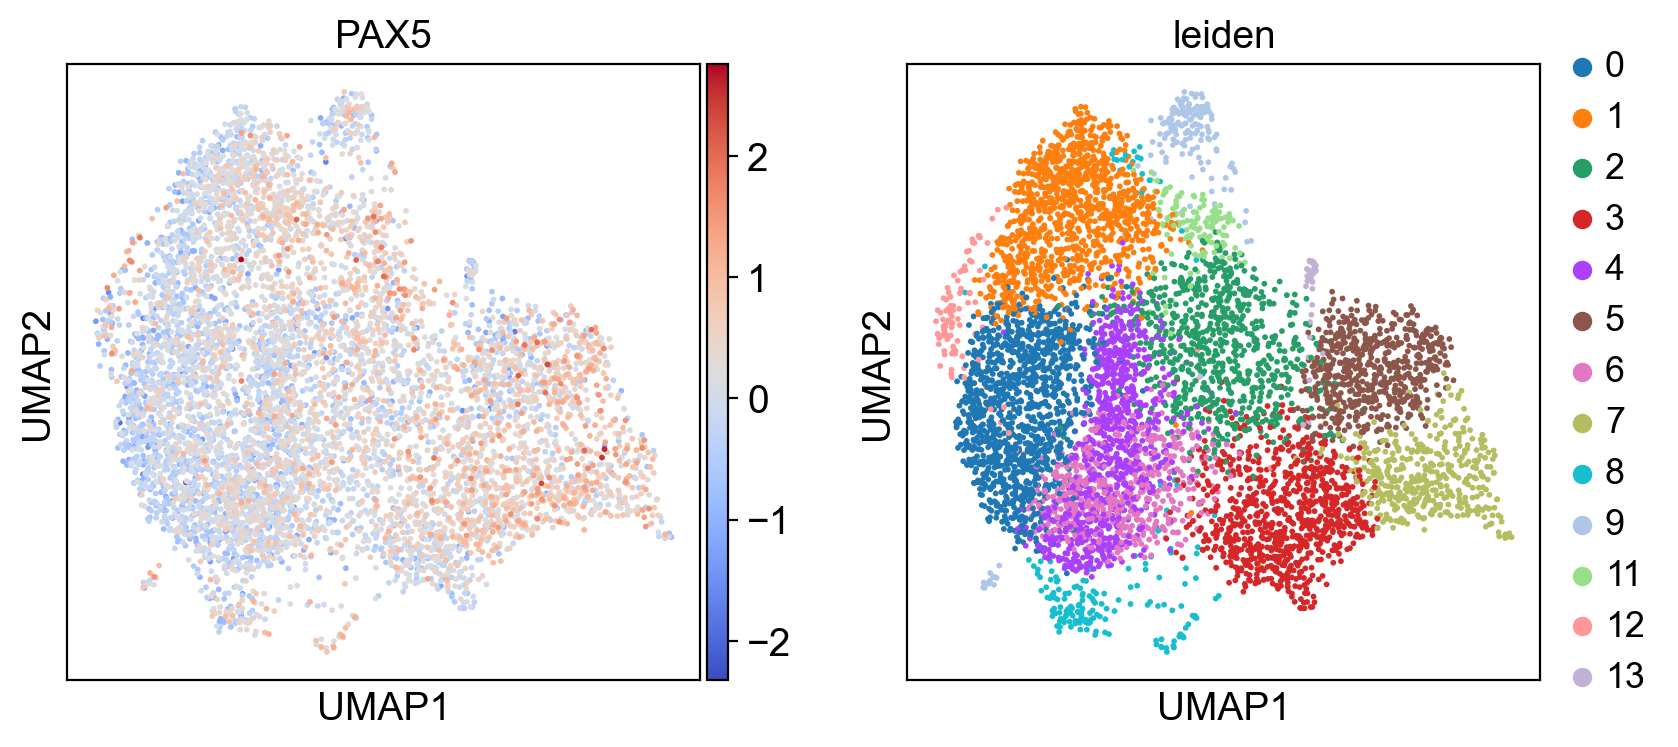

In [14]:
sc.pl.umap(acts, color=['PAX5', 'leiden'], cmap='coolwarm')

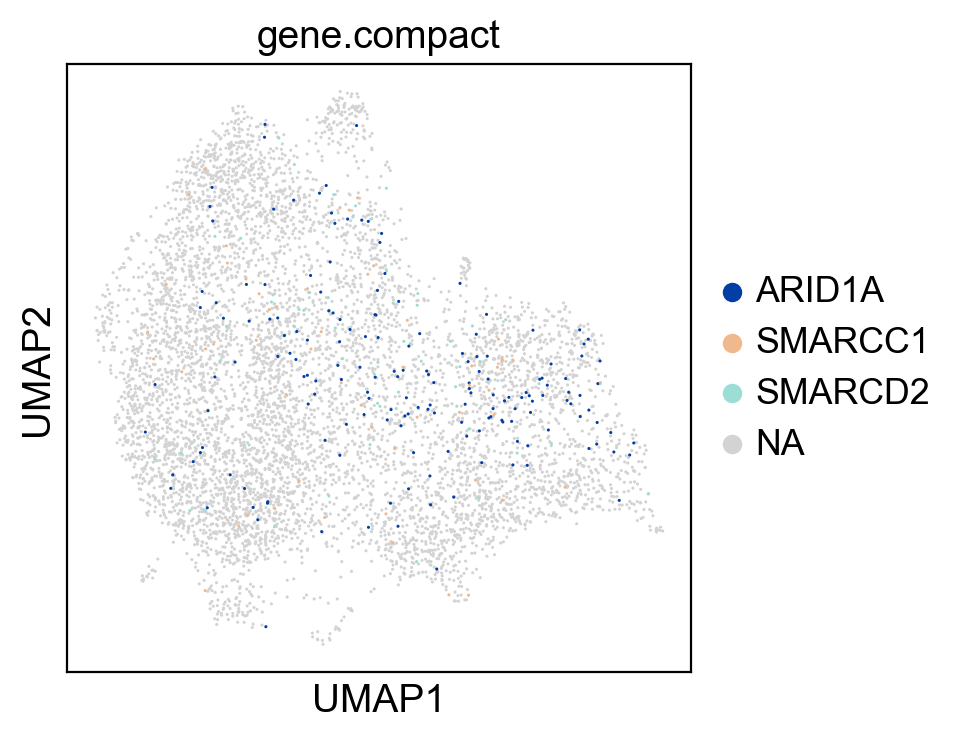

In [15]:
sc.pl.umap(adata,color='gene.compact',groups=['ARID1A','SMARCD2','SMARCC1'],s=5)

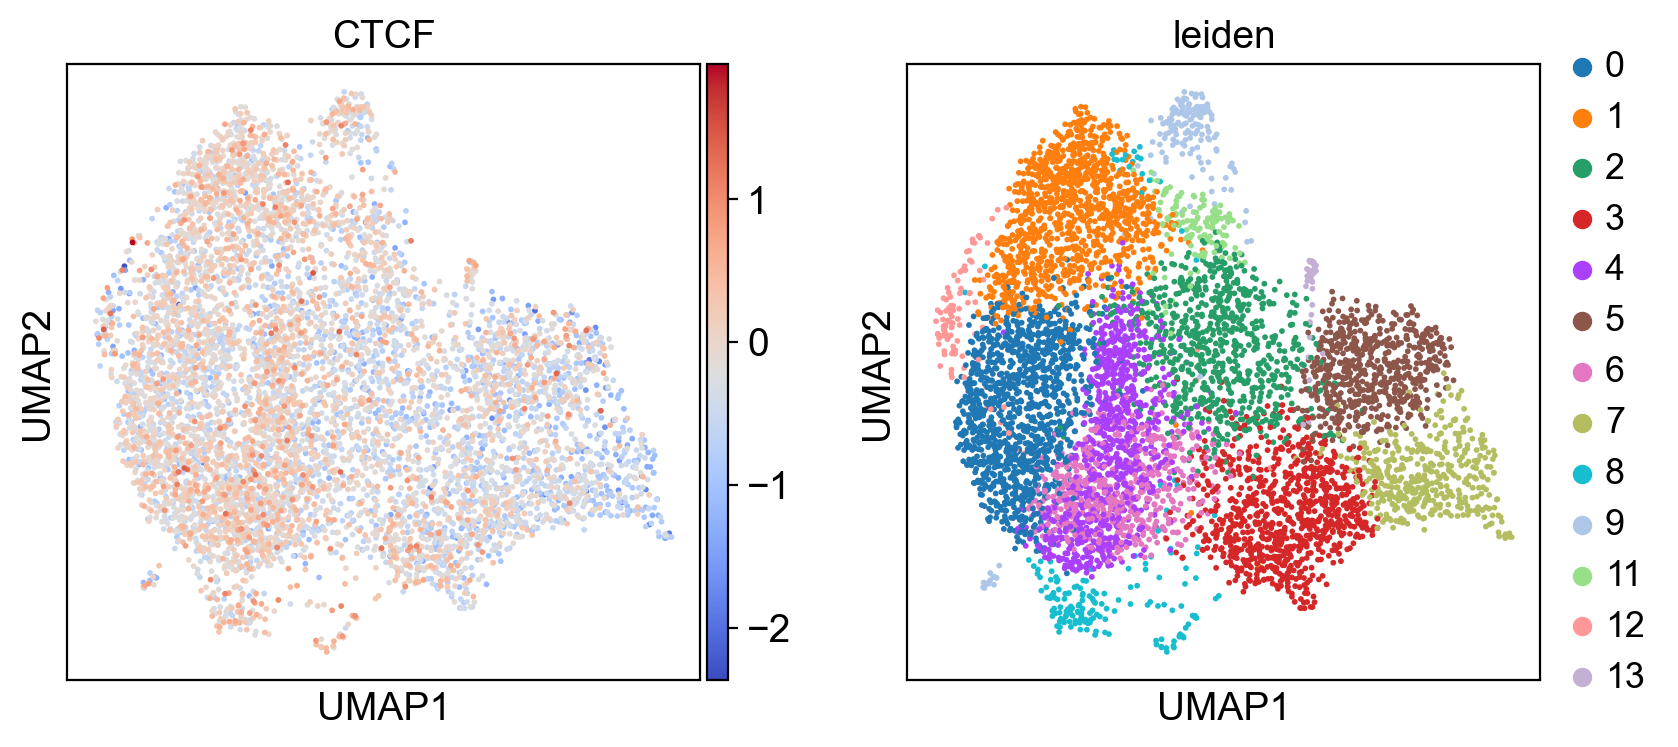

In [17]:
sc.pl.umap(acts, color=['CTCF', 'leiden'], cmap='coolwarm')

In [29]:
mean_acts = dc.summarize_acts(acts, groupby='gene', min_std=0)#0.75)
mean_acts

AHR        AR     ARID2    ARID3A      ARNT  \
ARID1A                -0.299330  2.619900  0.887714 -1.923480  1.047554   
ARID1A,ARID1B         -0.252474  2.633811  0.869516 -1.841394  1.133659   
ARID1A,ARID1B,ARID2   -0.348566  2.535656  0.933315 -1.768822  1.128895   
ARID1A,ARID1B,BRD9    -0.259023  2.737951  0.949639 -1.832241  1.067304   
ARID1A,ARID1B,DPF2    -0.131592  2.677565  0.819241 -1.882085  1.188722   
ARID1A,ARID1B,SMARCB1 -0.332960  2.692002  0.743008 -1.458296  1.271741   
ARID1A,ARID1B,SMARCE1 -0.425792  2.318836  1.086904 -1.843652  1.062582   
ARID1A,ARID2          -0.267107  2.717773  1.131379 -1.940692  1.116722   
ARID1A,BRD9           -0.196258  2.558913  0.877889 -1.897900  0.833996   
ARID1A,DPF2           -0.405673  2.563034  1.001075 -1.941448  1.157972   
ARID1A,SMARCB1        -0.472496  2.645869  0.987720 -1.585359  1.085240   
ARID1B                -0.296107  2.914390  1.018448 -1.977280  1.178741   
ARID1B,ARID2          -0.344864  2.808218  1.188018 -1.975112  1.178155   
ARID1B,ARID2,BRD9     -0.392121  2.673596  0.917344 -1.878551  0.753145   
ARID1B,ARID2,SMARCB1  -0.287903  2.809690  1.139518 -1.824366  0.632738   
ARID1B,BRD9           -0.201603  2.937966  0.836953 -2.058885  1.092608   
ARID1B,DPF2           -0.354196  2.759069  1.037246 -1.878196  1.306252   
ARID1B,GLTSCR1        -0.102789  2.553557  0.915444 -2.038935  1.175293   
ARID1B,SMARCB1        -0.266125  2.789770  0.862310 -1.765562  0.981558   
ARID1B,SMARCE1        -0.361078  2.571500  0.835645 -1.792860  1.027215   
ARID1B,SS18           -0.222906  3.189778  0.963117 -2.020118  1.361483   
ARID1B,control        -0.418581  2.893163  0.996607 -1.980232  1.255579   
ARID2                 -0.389053  2.810378  1.031539 -1.951829  1.194150   
ARID2,BRD9            -0.468340  2.642701  1.020617 -1.988003  1.083383   
ARID2,PBRM1           -0.284015  2.703147  0.971571 -2.007176  1.264447   
ARID2,SMARCB1         -0.463282  2.583598  1.067252 -1.862655  1.194766   
ARID2,SMARCE1         -0.398421  2.351613  1.144089 -1.773579  1.135499   
BCL7A                 -0.235479  3.000442  1.148772 -1.985416  1.208788   
BCL7B                 -0.413338  2.814345  1.194372 -1.882842  1.191481   
BCL7C                 -0.258144  2.894732  0.837110 -1.881769  1.179797   
BRD7                  -0.317612  2.938455  0.997406 -2.066278  1.215911   
BRD7,PBRM1            -0.365380  3.043668  0.835090 -1.862750  1.107477   
BRD9                  -0.292517  2.860952  0.932987 -2.067002  1.030326   
BRD9,GLTSCR1          -0.189291  2.674982  0.822853 -2.065086  0.962463   
BRD9,GLTSCR1,GLTSCR1L -0.281488  2.705308  0.874106 -2.035151  1.038538   
BRD9,GLTSCR1L         -0.326908  2.679026  0.882470 -1.868192  0.836361   
DPF2                  -0.353843  2.941321  0.993145 -1.897734  1.268407   
DPF2,PHF10            -0.494647  2.973721  1.128273 -2.082810  1.147851   
GLTSCR1               -0.238243  2.892074  0.958388 -2.049959  1.168153   
GLTSCR1,GLTSCR1L      -0.354807  2.771474  0.936717 -2.013310  1.064871   
GLTSCR1L              -0.233534  3.028065  1.041028 -2.014523  1.243802   
PBRM1                 -0.316341  2.902467  1.057415 -1.963203  1.276764   
PHF10                 -0.315168  2.972082  0.993941 -1.992419  1.205660   
SMARCA2               -0.306479  2.809414  0.887096 -1.949537  1.092689   
SMARCA2,SMARCA4       -0.350201  2.626593  0.947998 -1.831920  1.079827   
SMARCA4               -0.324188  2.695373  0.963359 -1.972522  1.137624   
SMARCB1               -0.402835  2.617453  1.010214 -1.897667  1.166170   
SMARCC1               -0.175429  2.576447  0.968216 -1.986809  1.218689   
SMARCC1,SMARCC2       -0.467446  2.478614  1.044613 -1.734768  1.249347   
SMARCC2               -0.349505  2.857770  1.011952 -1.958382  1.147832   
SMARCD1               -0.405242  2.809654  0.898230 -1.938727  1.057010   
SMARCD1,SMARCD2       -0.532253  2.480406  1.046827 -1.694766  1.004511   
SMARCD2               -0.422811  2.662568  1.251794 -

In [37]:
tfs=adata.obsm['dorothea_mlm_estimate'].columns
for tf in tfs:
    adata.obs['.'+tf]=adata.obsm['dorothea_mlm_estimate'][tf]
    

In [38]:
x=perturb.pp.obs_mean_with_sig(adata,
                    obs_list=['.'+tf for tf in tfs],
                    ref='control',
                   grouping_variable='gene')

.AHR
.AR
.ARID2
.ARID3A
.ARNT
.ARNTL
.ASCL1
.ATF1
.ATF2
.ATF3
.ATF4
.ATF6
.ATF7
.BACH1
.BACH2
.BATF
.BCL11A
.BCL6
.BHLHE22
.BHLHE40
.CDX2
.CEBPA
.CEBPB
.CEBPD
.CEBPG
.CLOCK
.CREB1
.CREB3
.CREB3L1
.CREM
.CTCF
.CTCFL
.CUX1
.DEAF1
.DUX4
.E2F1
.E2F2
.E2F3
.E2F4
.E2F5
.E2F6
.E2F7
.EBF1
.EGR1
.EHF
.ELF1
.ELF3
.ELF5
.ELK1
.ELK4
.EOMES
.EPAS1
.ERG
.ESR1
.ESR2
.ESRRA
.ETS1
.ETS2
.ETV1
.ETV4
.ETV6
.FLI1
.FOS
.FOSL1
.FOSL2
.FOXA1
.FOXA2
.FOXJ2
.FOXK1
.FOXK2
.FOXL2
.FOXM1
.FOXO1
.FOXO3
.FOXO4
.FOXP1
.FOXP2
.GABPA
.GATA1
.GATA2
.GATA3
.GATA4
.GATA6
.GFI1B
.GLI1
.GLI2
.GRHL2
.HBP1
.HES1
.HHEX
.HIC1
.HIF1A
.HINFP
.HMBOX1
.HNF1B
.HNF4A
.HNF4G
.HOXA9
.HOXB13
.HSF1
.IKZF1
.IRF1
.IRF2
.IRF3
.IRF4
.IRF8
.IRF9
.JUN
.JUNB
.JUND
.KDM5B
.KLF1
.KLF13
.KLF3
.KLF4
.KLF5
.KLF6
.KLF9
.KMT2A
.KMT2B
.LEF1
.LHX2
.LYL1
.MAF
.MAFB
.MAFF
.MAFG
.MAFK
.MAX
.MAZ
.MBD1
.MBD2
.MEF2A
.MEF2B
.MEF2C
.MEIS1
.MEIS2
.MITF
.MNT
.MXI1
.MYB
.MYBL2
.MYC
.MYCN
.MYOD1
.NANOG
.NCOA1
.NCOA2
.NCOA3
.NEUROD1
.NFATC1
.NFE2
.NFE2L1
.NFE2L2
.N

In [31]:
genes=['ACTL6B', 'SS18L', 'DPF3', 'SMARCD3', 'DPF1', 'GLTSCR1', 
       'GLTSCR1L', 'SS18', 'SMARCD1', 'DPF2', 'ARID2', 'SMARCC2', 
       'BCL7C', 'SMARCA2', 'BCL7B', 'SMARCB1', 'SMARCD2', 'ARID1B',
       'PBRM1', 'BCL7A', 'ACTL6A', 'SMARCE1', 'ARID1A', 'BRD9', 'BRD7', 
       'SMARCA4', 'PHF10', 'SMARCC1']
len(genes)
genes=['ARID1A','SMARCB1','SMARCE1','SMARCC1','SMARCD2','SMARCA4','BRD9','SMARCD1',
       'ACTL6A',
       'ACTL6B', 'SS18L', 'DPF3', 'SMARCD3', 'DPF1', 'GLTSCR1', 
       'GLTSCR1L', 'SS18',  'DPF2', 'ARID2', 'SMARCC2', 
       'BCL7C', 'SMARCA2', 'BCL7B',  'ARID1B',
       'PBRM1', 'BCL7A',   'BRD7', 
       'PHF10', 
      ]


In [39]:
x[0].shape

(59, 286)

/Users/ursuo/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Index(['.ESR2', '.RUNX2', '.TP73', '.SP3', '.STAT1', '.E2F5', '.MYCN',
       '.CREB3L1', '.NFE2L2', '.TEAD2',
       ...
       '.NR2C2', '.HSF1', '.LEF1', '.E2F1', '.SP1', '.THAP11', '.CEBPD',
       '.ETS1', '.E2F4', '.MYC'],
      dtype='object', length=286)


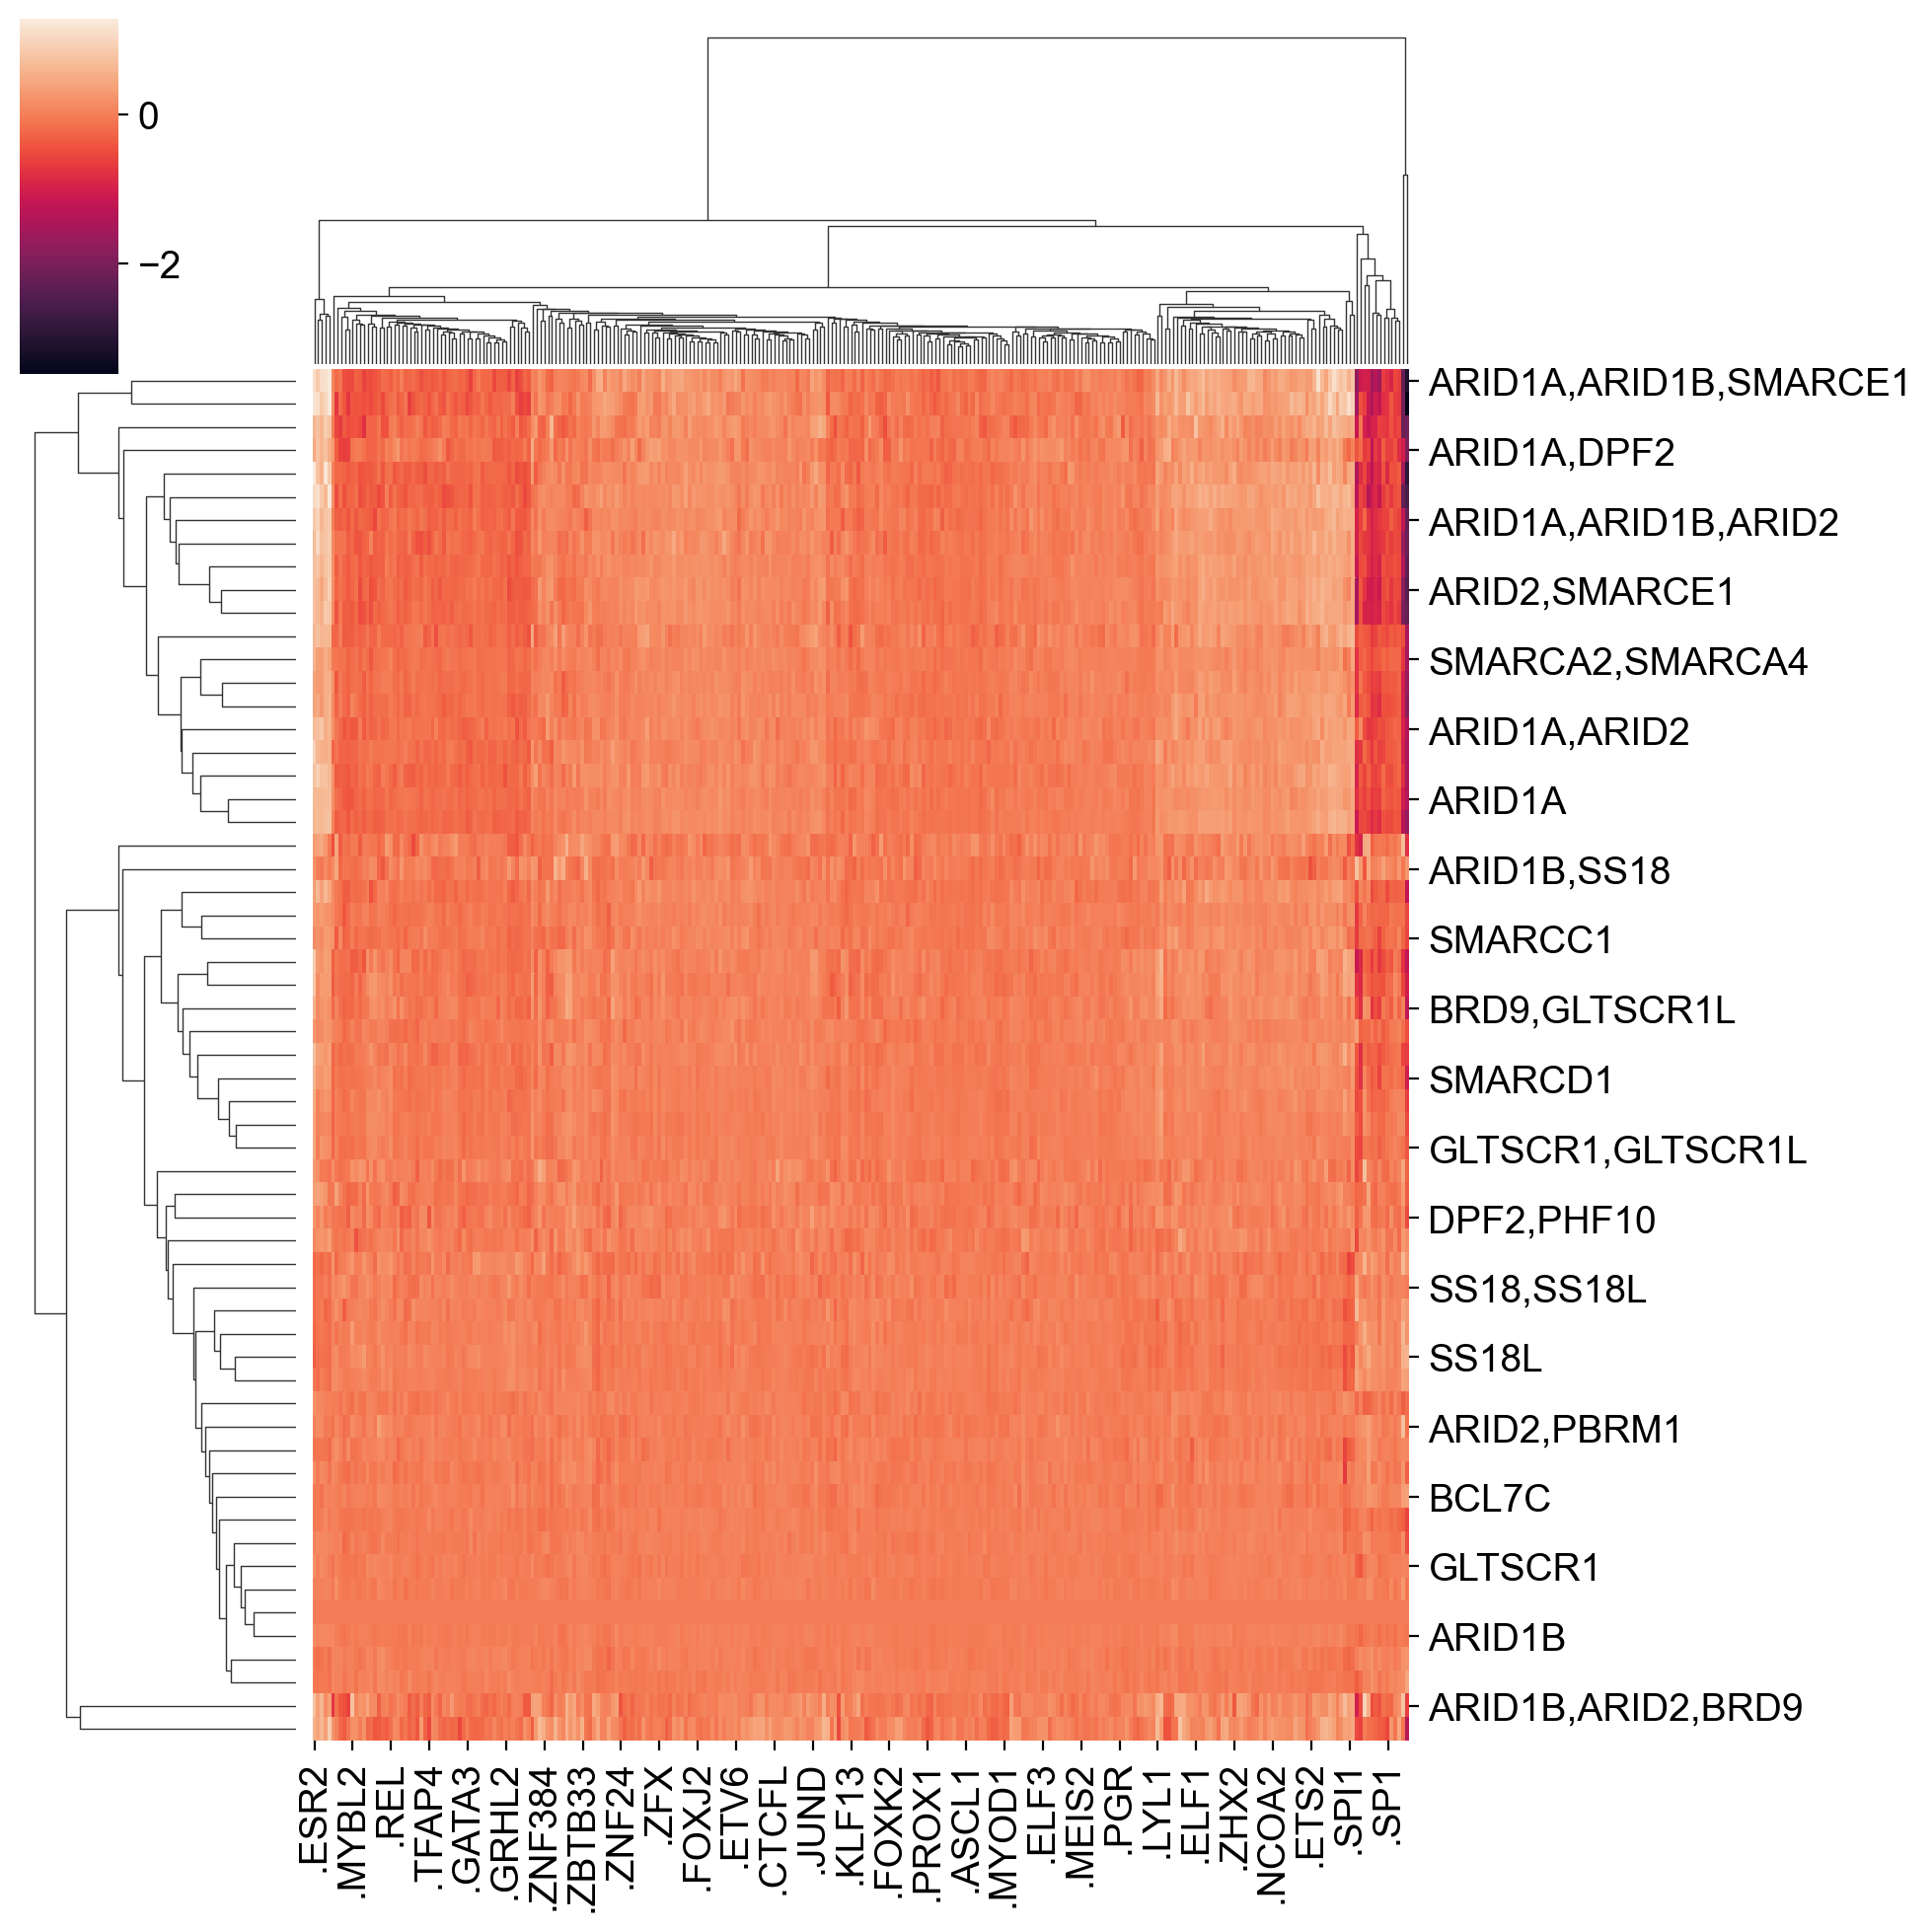

In [40]:
g=sns.clustermap(x[0])
sorted_tfs=x[0].columns[g.dendrogram_col.reordered_ind]
print(sorted_tfs)
sorted_genes=x[0].index[g.dendrogram_row.reordered_ind]

/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sizes[sizes<best_p]=best_p
/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:270: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.bwr),


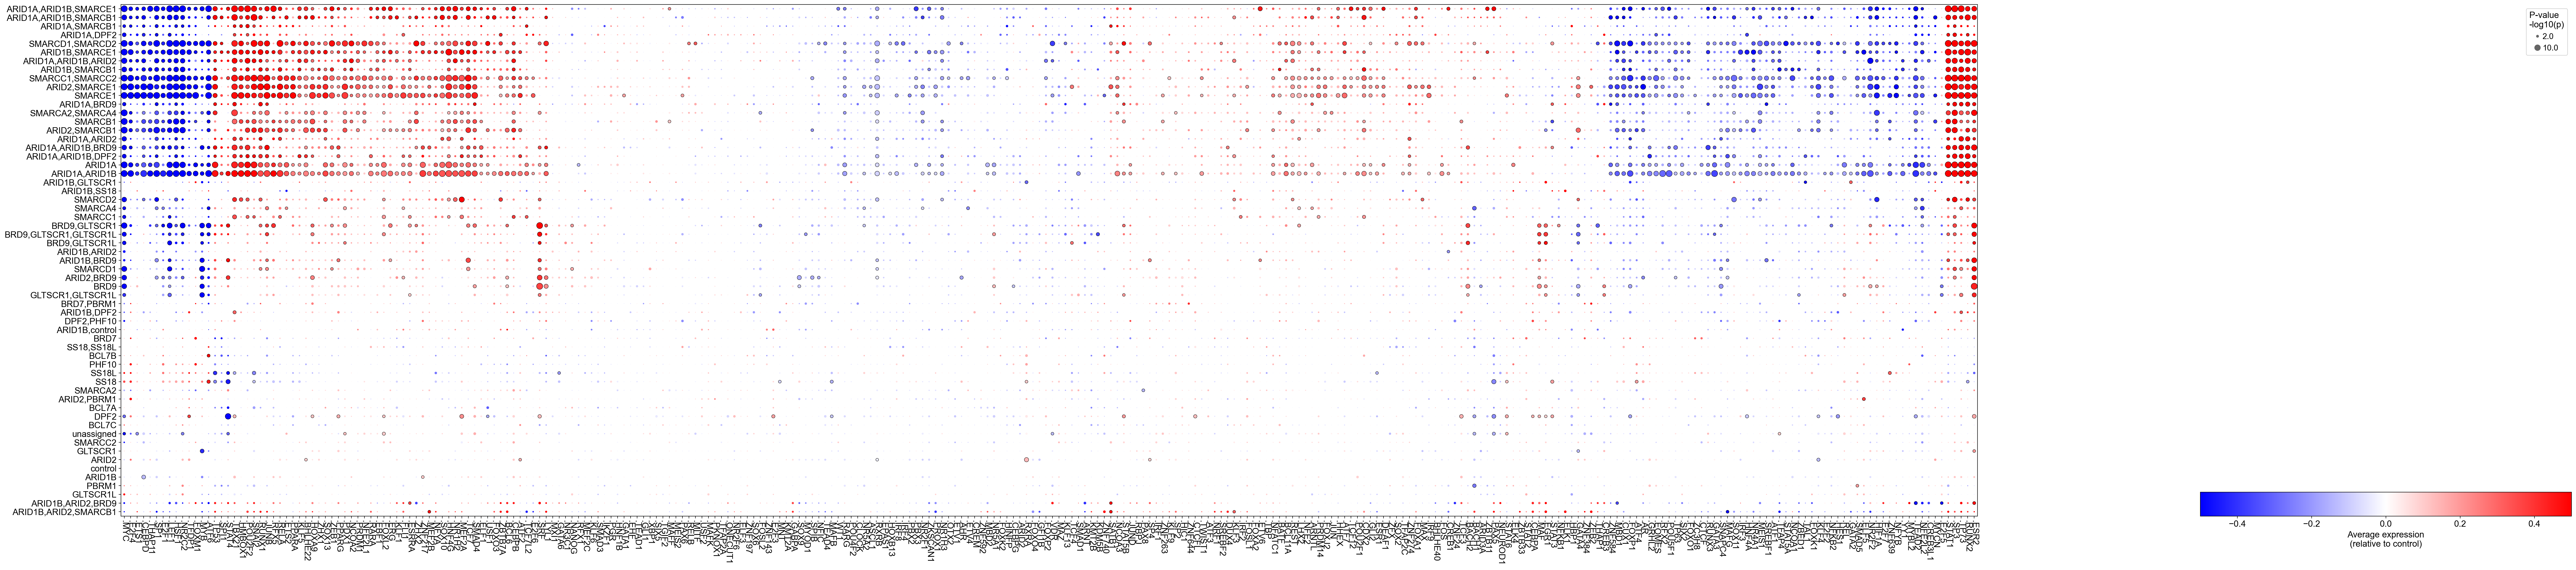

In [44]:
perturb.pl.dotplot2(x[0],x[1],sorted_tfs,sorted_genes,w=70,h=15,best_p=1e-10,
        title='Average expression\n(relative to control)')

/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sizes[sizes<best_p]=best_p
/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:270: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.bwr),


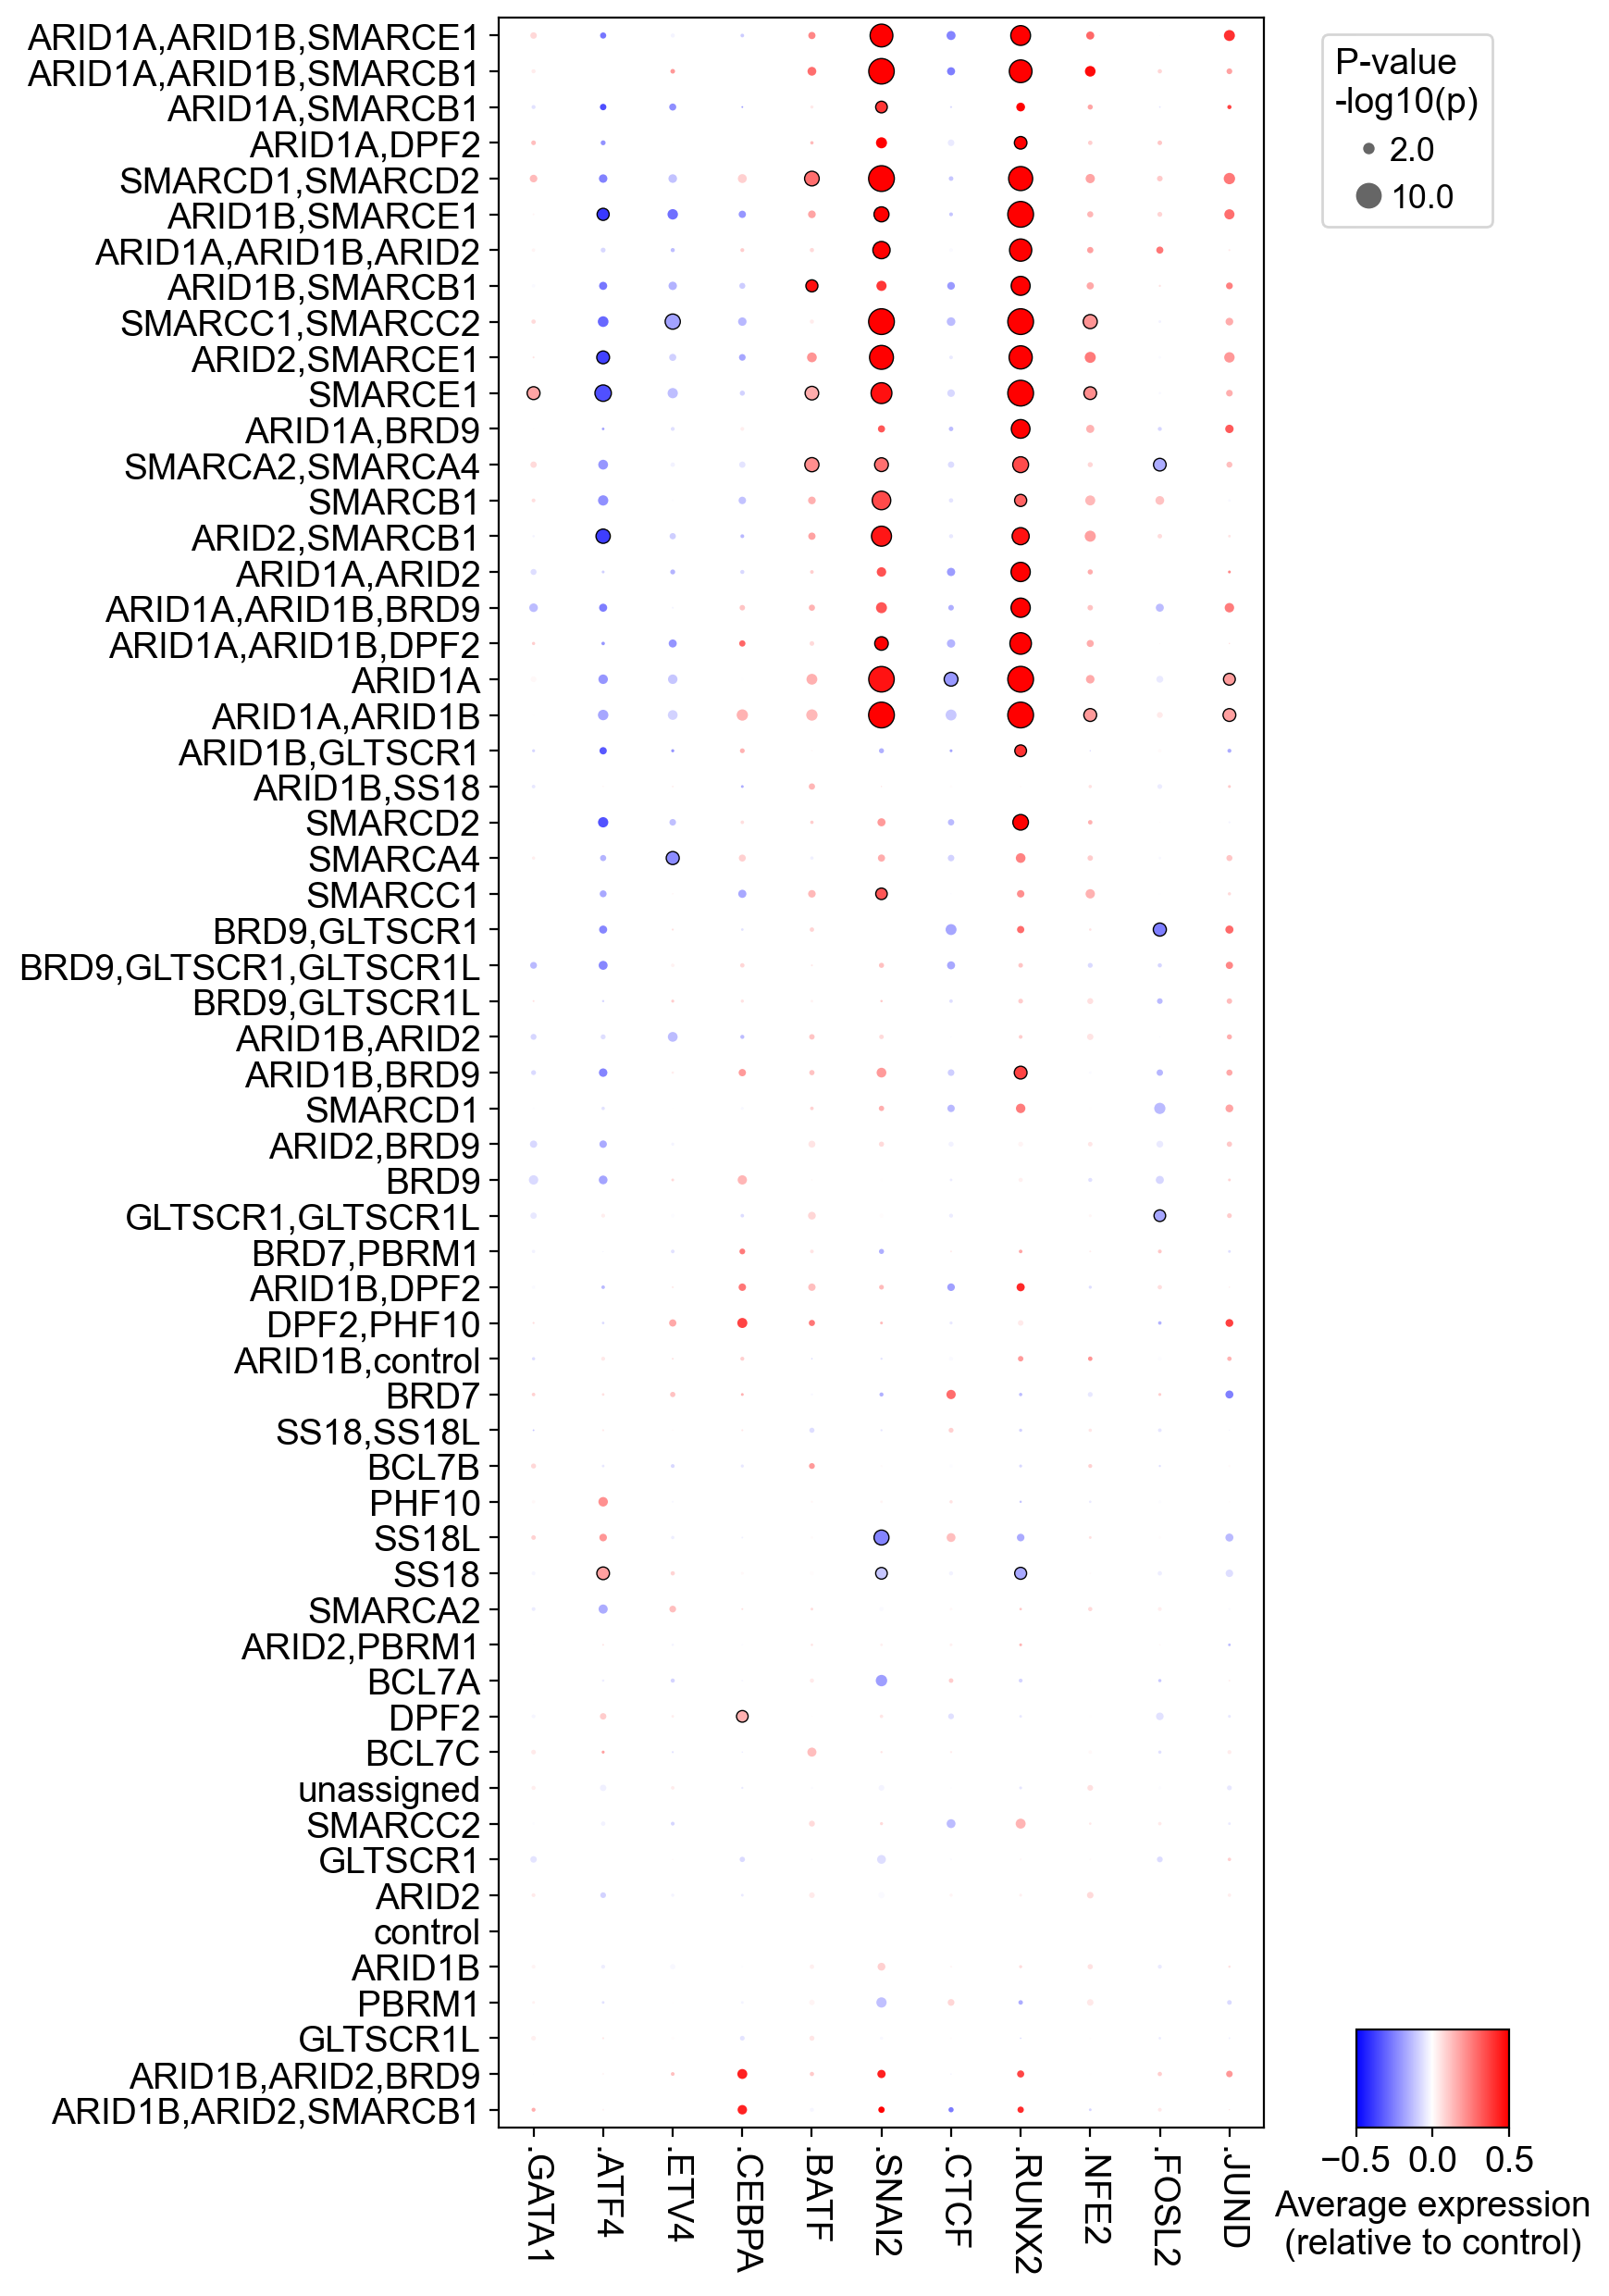

In [46]:
perturb.pl.dotplot2(x[0],x[1],['.'+tf for tf in keep],sorted_genes,w=7,h=15,best_p=1e-10,
        title='Average expression\n(relative to control)')

/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sizes[sizes<best_p]=best_p
/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:270: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.bwr),


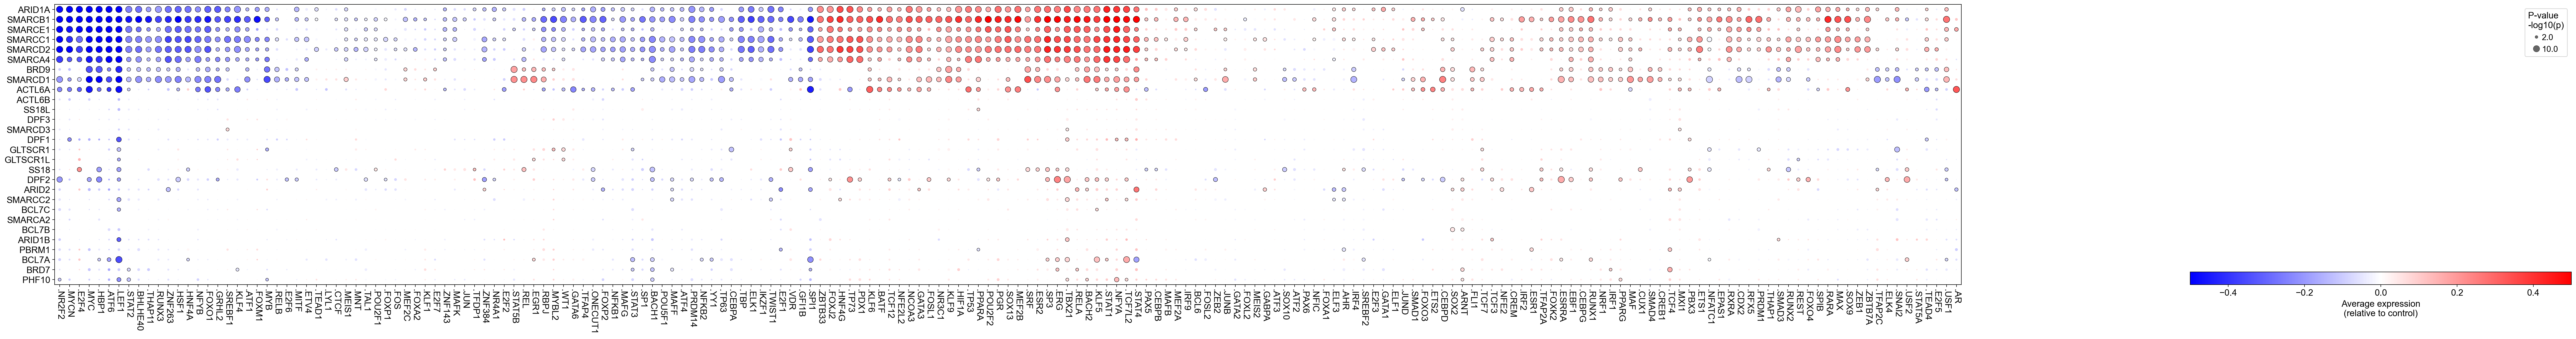

In [118]:
perturb.pl.dotplot2(x[0],x[1],sorted_tfs,genes[::1],w=70,h=8,best_p=1e-10,
        title='Average expression\n(relative to control)')

In [48]:
net.to_csv('/Users/ursuo/Documents/TFnet.ABC.csv')

In [50]:
net2=net.loc[net['target'].isin(tfs),:]
net2.shape

(1931, 4)

In [52]:
net2.to_csv('/Users/ursuo/Documents/TFTFnet.ABC.csv')

In [54]:
FIGS

'/Users/ursuo/Documents/research/baf/data/2022-03-27/Figures/'

In [55]:
x[0].to_csv(FIGS+'combo.TFeffect.mean.csv')
x[1].to_csv(FIGS+'combo.TFeffect.p.csv')

In [61]:
ps=1e-20

slogp=np.multiply(np.sign(x[0]),-np.log10(x[1]+ps))
slogp.to_csv(FIGS+'combo.TFeffect.slog10p.csv')

In [71]:
nattr

value
MITF   -0.141237
SNAI2   0.142769
YY1    -0.188374
CTCF   -0.073345
TCF7L2  0.365770
TRPS1   0.000000
RUNX2   0.176135
E2F1   -0.238597
ETV4   -0.039292
GATA1   0.170045
NFE2    0.004372
SPI1   -0.205966
ESR1    0.030575
GATA2  -0.022483
ETS1    0.157284
JUN    -0.076412
HNF4A  -0.273229
CEBPA   0.004062
MYC    -0.529535
MYB    -0.156337
FOXA1   0.047156
LEF1   -0.800392
FOS    -0.049859
AR     -0.012868
CEBPE   0.000000
ATF4   -0.134070
FLI1   -0.049456
NFKB1  -0.120387
USF1    0.125684
TCF7   -0.027966
JUND   -0.032158
EGR1    0.023114
PRDM14 -0.203915
FOSL2   0.073282
VDR    -0.084962
RUNX1   0.131191
RUNX3  -0.194114
BATF    0.144814
USF2   -0.027803
ESR2    0.271578
FOSB    0.000000
CUX1    0.055073
GATA3   0.195923
HIF1A   0.210711

In [ ]:
sns.clustermap(mean_acts.T, yticklabels=mean_acts.columns, vmin=-5, vmax=5, cmap='coolwarm',
               z_score=0,
              xticklabels=True)
plt.show()

In [ ]:
sns.clustermap(mean_acts.T, yticklabels=True, vmin=-5, vmax=5, cmap='coolwarm',
               z_score=0,figsize=(10,50),
              xticklabels=True)
plt.show()

In [ ]:
keep=['JUND','FOSL2','NFE2','RUNX2',
     'CTCF','SNAI2',
      'BATF','CEBPA','ETV4','ATF4','GATA1',
     
     
     
     ]
#keep=['CTCF','SNAI2']
others=list(set(mean_acts.index).difference(set(['control'])))
x=0.3

sns.clustermap((mean_acts.loc[others,keep]-mean_acts.loc['control',keep]).T, 
               vmin=-x,vmax=x,
               yticklabels=True, cmap='bwr',
               figsize=(15,5),
              xticklabels=True)
plt.show()

In [ ]:
acts

In [ ]:
ps=1e-20
a=plt.hist(-np.log10(np.array(acts.obsm['dorothea_mlm_pvals']).flatten()+ps),100)

In [ ]:
logFCs, pvals = dc.get_contrast(adata,
                                group_col='gene.compact',
                                condition_col='control',
                                condition='0',
                                reference='1',
                                method='t-test'
                               )
logFCs

In [ ]:
adata

In [126]:
# Retrieve PROGENy model weights
progeny = dc.get_progeny(top=300)



TypeError: 'fill_value=source' is not present in this Categorical's categories

In [ ]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=adata.uns['coef.gene2'], net=progeny, 
                                         source='source', 
                                         target='target', 
                                         weight='weight')
pathway_acts

In [ ]:
sns.clustermap(pathway_acts, center=0, cmap='coolwarm')
plt.show()